In [1]:
### 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
new_credit = pd.read_csv('C:/Users/wjsru/Documents/ds_study/source_code/credit.csv', index_col = 0)
new_credit

,ID,MONTHS_BALANCE,STATUS,CREDIT_SCORE,CREDIT_TOTAL,OPEN_MONTH,END_MONTH,WINDOW,SCALED_SCORE,CREDIT_USE_MONTH,NOT_USED_MONTH
0,5001711,0,X,3,18,-3,0,4,4.500000,3.0,1.0
1,5001711,-1,0,5,18,-3,0,4,4.500000,3.0,1.0
2,5001711,-2,0,5,18,-3,0,4,4.500000,3.0,1.0
3,5001711,-3,0,5,18,-3,0,4,4.500000,3.0,1.0
4,5001712,0,C,6,104,-18,0,19,5.473684,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,6,180,-29,0,30,6.000000,30.0,0.0
1048571,5150487,-26,C,6,180,-29,0,30,6.000000,30.0,0.0
1048572,5150487,-27,C,6,180,-29,0,30,6.000000,30.0,0.0
1048573,5150487,-28,C,6,180,-29,0,30,6.000000,30.0,0.0


In [4]:
### 신용형태정보와 신용거래기간을 반영하는 수치 항목 추가

In [5]:
#### 개개인별 상환률에 따른 점수 차등화(C_RATIO)

**연체에 대하여 상환을 꾸준히 해온 수치를 보여준다**

In [7]:
new_credit

,ID,MONTHS_BALANCE,STATUS,CREDIT_SCORE,CREDIT_TOTAL,OPEN_MONTH,END_MONTH,WINDOW,SCALED_SCORE,CREDIT_USE_MONTH,NOT_USED_MONTH
0,5001711,0,X,3,18,-3,0,4,4.500000,3.0,1.0
1,5001711,-1,0,5,18,-3,0,4,4.500000,3.0,1.0
2,5001711,-2,0,5,18,-3,0,4,4.500000,3.0,1.0
3,5001711,-3,0,5,18,-3,0,4,4.500000,3.0,1.0
4,5001712,0,C,6,104,-18,0,19,5.473684,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,C,6,180,-29,0,30,6.000000,30.0,0.0
1048571,5150487,-26,C,6,180,-29,0,30,6.000000,30.0,0.0
1048572,5150487,-27,C,6,180,-29,0,30,6.000000,30.0,0.0
1048573,5150487,-28,C,6,180,-29,0,30,6.000000,30.0,0.0


In [8]:
(new_credit.loc[new_credit['ID'] == 5001718, 'STATUS'] != 'X')

142     True
143     True
144     True
145     True
146     True
147     True
148     True
149     True
150     True
151    False
152     True
153    False
154     True
155    False
156     True
157    False
158    False
159    False
160     True
161     True
162     True
163    False
164     True
165     True
166     True
167     True
168     True
169     True
170    False
171     True
172    False
173     True
174     True
175     True
176     True
177     True
178     True
179     True
180    False
Name: STATUS, dtype: bool

In [9]:
new_credit[new_credit['ID'] == 5001718]

,ID,MONTHS_BALANCE,STATUS,CREDIT_SCORE,CREDIT_TOTAL,OPEN_MONTH,END_MONTH,WINDOW,SCALED_SCORE,CREDIT_USE_MONTH,NOT_USED_MONTH
142,5001718,0,C,6,176,-38,0,39,4.512821,29.0,10.0
143,5001718,-1,C,6,176,-38,0,39,4.512821,29.0,10.0
144,5001718,-2,C,6,176,-38,0,39,4.512821,29.0,10.0
145,5001718,-3,0,5,176,-38,0,39,4.512821,29.0,10.0
146,5001718,-4,0,5,176,-38,0,39,4.512821,29.0,10.0
147,5001718,-5,0,5,176,-38,0,39,4.512821,29.0,10.0
148,5001718,-6,0,5,176,-38,0,39,4.512821,29.0,10.0
149,5001718,-7,0,5,176,-38,0,39,4.512821,29.0,10.0
150,5001718,-8,1,4,176,-38,0,39,4.512821,29.0,10.0
151,5001718,-9,X,3,176,-38,0,39,4.512821,29.0,10.0


In [10]:
(new_credit.loc[new_credit['ID'] == 5001718, 'STATUS'] == 'C').sum()

3

In [11]:
new_credit['C_COUNT'] = np.nan

In [12]:
for id in new_credit['ID'].unique():
    new_credit.loc[new_credit['ID'] == id, 'C_COUNT'] = (new_credit.loc[new_credit['ID'] == id, 'STATUS'] == 'C').sum()

In [13]:
new_credit['C_RATIO'] = new_credit['C_COUNT'] / new_credit['CREDIT_USE_MONTH']

In [14]:
new_credit[['C_RATIO', 'SCALED_SCORE']].corr()

,C_RATIO,SCALED_SCORE
C_RATIO,1.000000,0.748841
SCALED_SCORE,0.748841,1.000000


In [15]:
##### C_RATIO에 따른 점수 차등화

In [16]:
new_credit['C_RATIO'].describe()

count    947052.000000
mean          0.492576
std           0.371448
min           0.000000
25%           0.000000
50%           0.615385
75%           0.823529
max           1.000000
Name: C_RATIO, dtype: float64

<Axes: xlabel='C_RATIO'>

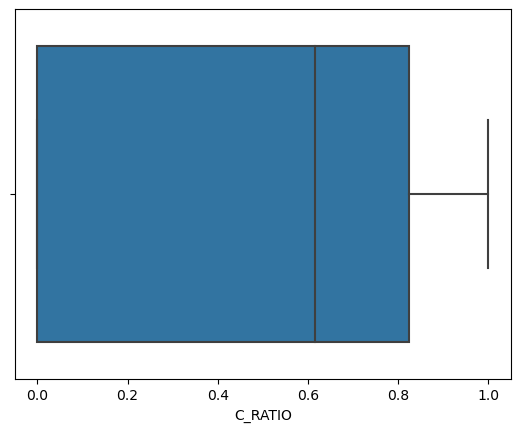

In [17]:
sns.boxplot(data=new_credit, x='C_RATIO')

C:\Users\wjsru\AppData\Local\Temp\ipykernel_13740\3441060484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_credit['C_RATIO'])


<Axes: xlabel='C_RATIO', ylabel='Density'>

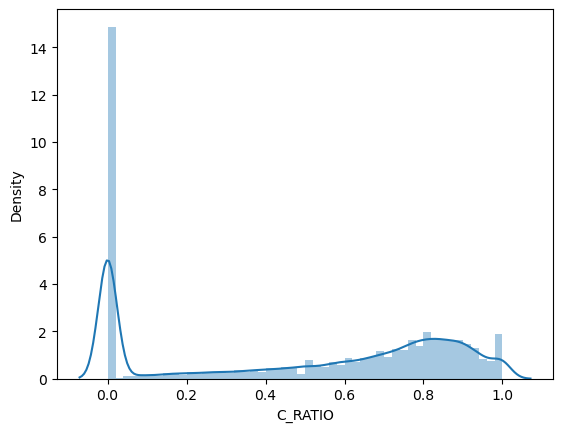

In [18]:
sns.distplot(new_credit['C_RATIO'])

In [19]:
#### 개개인별 STATUS == 0인 비율에 따른 점수 차등화(0_RATIO)

데이터를 살펴보면, 연속적으로 STATUS == 0이 유지되는 CASE가 있다.  
이것은 신용카드 사용자가 STATUS가 1로 넘어가지 않게 이전 달 연체금을 꾸준히 갚고 있음을 의미한다.  
이것이 신용점수에 어떠한 방식으로 유의미하게 작용하는지 살펴볼 필요가 있다.  
다만, STATUS == 1인 비율은 구하지 않는다. 왜냐하면 STATUS == 1은 60일 이상 연체되기 전 단계로 2달 연속으로 연체된 상태이다. 그래서 위험 단계로 판단했다.

In [20]:
new_credit['0_COUNT'] = np.nan

In [21]:
for id in new_credit['ID'].unique():
    new_credit.loc[new_credit['ID'] == id, '0_COUNT'] = (new_credit.loc[new_credit['ID'] == id, 'STATUS'] == '0').sum()

In [22]:
new_credit['0_RATIO'] = new_credit['0_COUNT'] / new_credit['CREDIT_USE_MONTH']

In [23]:
new_credit[['C_RATIO', '0_RATIO', 'SCALED_SCORE']].corr()

,C_RATIO,0_RATIO,SCALED_SCORE
C_RATIO,1.000000,-0.982490,0.748841
0_RATIO,-0.982490,1.000000,-0.705754
SCALED_SCORE,0.748841,-0.705754,1.000000


In [24]:
##### 0_RATIO에 따른 점수 차등화

In [25]:
new_credit['0_RATIO'].describe()

count    947052.000000
mean          0.490116
std           0.365781
min           0.000000
25%           0.166667
50%           0.363636
75%           0.962963
max           1.000000
Name: 0_RATIO, dtype: float64

<Axes: xlabel='0_RATIO'>

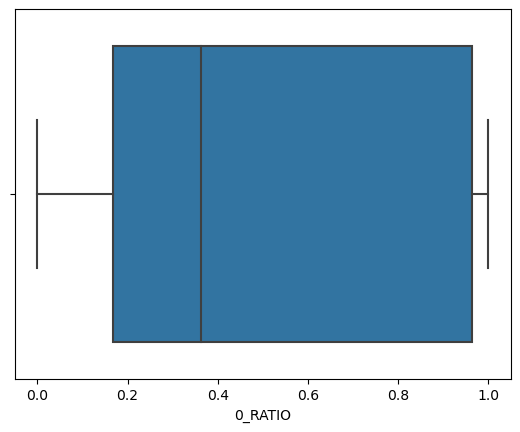

In [26]:
sns.boxplot(data=new_credit, x='0_RATIO')

C:\Users\wjsru\AppData\Local\Temp\ipykernel_13740\1881712631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_credit['0_RATIO'])


<Axes: xlabel='0_RATIO', ylabel='Density'>

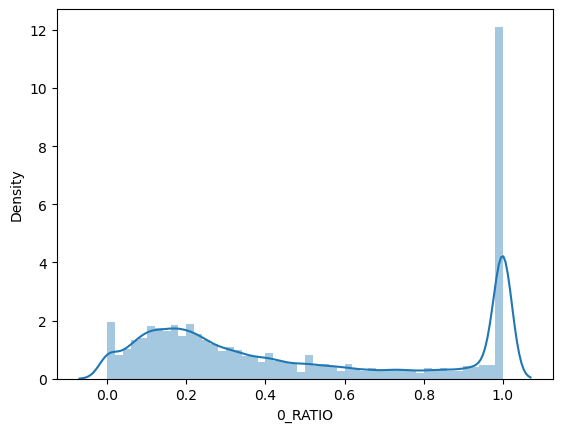

In [27]:
sns.distplot(new_credit['0_RATIO'])